In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('/content/Iris.csv')
df




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#one hot encoding on species columne
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[['Species']])
encoded_cols = encoder.get_feature_names_out(['Species'])
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)
df_final = pd.concat([df.drop(columns='Species'), encoded_df], axis=1)
df_final

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,147,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,148,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,149,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [ ]:

# training the dataset
X = df_final[['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']]
y = df_final[['Species_Iris-setosa',	'Species_Iris-versicolor',	'Species_Iris-virginica']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30



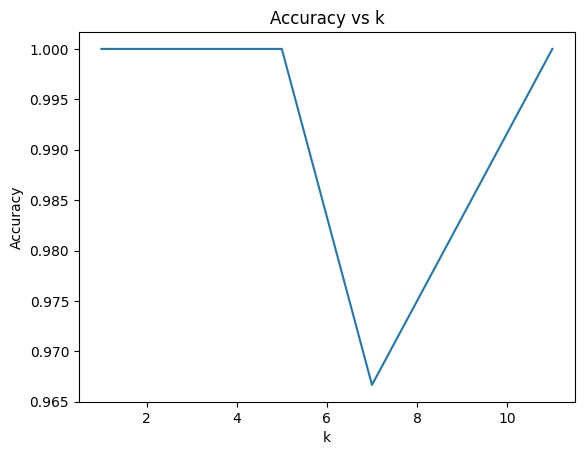

In [ ]:
k_values = [1, 3, 5, 7, 11]
accuracy_values = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    accuracy_values.append(accuracy)
plt.plot(k_values, accuracy_values)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()